In [ ]:
import os
import requests
import tarfile
from pathlib import Path
import random
from tqdm import tqdm

def download_and_extract_subset(save_dir='./data/food101_mini', num_classes=10, imgs_per_class=50, seed=42):
    random.seed(seed)

    base_url = "http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz"
    tar_path = Path(save_dir) / "food-101.tar.gz"
    extracted_path = Path(save_dir) / "food-101"

    if not tar_path.exists():
        print("🔽 Downloading Food-101 (compressed)...")
        with requests.get(base_url, stream=True) as r:
            r.raise_for_status()
            with open(tar_path, "wb") as f:
                for chunk in tqdm(r.iter_content(chunk_size=8192), desc="Downloading"):
                    f.write(chunk)

    if not extracted_path.exists():
        print("📦 Extracting...")
        with tarfile.open(tar_path, "r:gz") as tar:
            members = [m for m in tar.getmembers() if "images" in m.name]
            tar.extractall(path=save_dir, members=members)

    images_dir = extracted_path / "images"
    class_dirs = sorted(os.listdir(images_dir))
    selected_classes = random.sample(class_dirs, num_classes)
    print(f"✅ Selected Classes: {selected_classes}")

    output_root = Path(save_dir) / f"mini_{num_classes}class_{imgs_per_class}each"
    for phase in ['train', 'val']:
        for cls in selected_classes:
            (output_root / phase / cls).mkdir(parents=True, exist_ok=True)

    for cls in selected_classes:
        cls_dir = images_dir / cls
        image_files = sorted(os.listdir(cls_dir))
        selected = random.sample(image_files, imgs_per_class)
        split = int(imgs_per_class * 0.8)
        train_files = selected[:split]
        val_files = selected[split:]

        for img in train_files:
            src = cls_dir / img
            dst = output_root / 'train' / cls / img
            os.link(src, dst)  

        for img in val_files:
            src = cls_dir / img
            dst = output_root / 'val' / cls / img
            os.link(src, dst)

    print(f"📁 Subset saved to: {output_root}")
    return output_root

download_and_extract_subset(
    save_dir="./data",
    num_classes=10,
    imgs_per_class=50
)


🔽 Downloading Food-101 (compressed)...


Downloading: 609898it [22:40, 448.41it/s] 


📦 Extracting...
✅ Selected Classes: ['ramen', 'carrot_cake', 'beef_carpaccio', 'strawberry_shortcake', 'escargots', 'donuts', 'croque_madame', 'cheesecake', 'caprese_salad', 'sashimi']
📁 Subset saved to: data\mini_10class_50each


WindowsPath('data/mini_10class_50each')

c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



🚀 Training resnet18...


[Train 1]: 100%|██████████| 25/25 [00:01<00:00, 13.29it/s]


Epoch 1: Train Loss=2.7004, Val Loss=2.3955, Acc=0.1300


[Train 2]: 100%|██████████| 25/25 [00:01<00:00, 14.96it/s]


Epoch 2: Train Loss=2.5731, Val Loss=2.3087, Acc=0.1800


[Train 3]: 100%|██████████| 25/25 [00:01<00:00, 14.81it/s]


Epoch 3: Train Loss=2.5072, Val Loss=2.2613, Acc=0.1900


[Train 4]: 100%|██████████| 25/25 [00:01<00:00, 14.21it/s]


Epoch 4: Train Loss=2.4956, Val Loss=2.2515, Acc=0.2200


[Train 5]: 100%|██████████| 25/25 [00:01<00:00, 13.68it/s]


Epoch 5: Train Loss=2.3874, Val Loss=2.2069, Acc=0.2000


[Train 6]: 100%|██████████| 25/25 [00:01<00:00, 13.65it/s]


Epoch 6: Train Loss=2.5095, Val Loss=2.1750, Acc=0.2400


[Train 7]: 100%|██████████| 25/25 [00:01<00:00, 13.99it/s]


Epoch 7: Train Loss=2.3108, Val Loss=2.1930, Acc=0.2300


[Train 8]: 100%|██████████| 25/25 [00:01<00:00, 14.07it/s]


Epoch 8: Train Loss=2.3512, Val Loss=2.1218, Acc=0.2400


[Train 9]: 100%|██████████| 25/25 [00:01<00:00, 13.67it/s]


Epoch 9: Train Loss=2.2637, Val Loss=2.1194, Acc=0.3000


[Train 10]: 100%|██████████| 25/25 [00:01<00:00, 13.69it/s]


Epoch 10: Train Loss=2.2545, Val Loss=2.0768, Acc=0.3000

🚀 Training resnet34...


c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:07<00:00, 11.8MB/s]
[Train 1]: 100%|██████████| 25/25 [00:02<00:00, 11.10it/s]


Epoch 1: Train Loss=2.7051, Val Loss=2.5306, Acc=0.0800


[Train 2]: 100%|██████████| 25/25 [00:02<00:00, 12.36it/s]


Epoch 2: Train Loss=2.6310, Val Loss=2.4994, Acc=0.0900


[Train 3]: 100%|██████████| 25/25 [00:02<00:00, 12.33it/s]


Epoch 3: Train Loss=2.5931, Val Loss=2.4356, Acc=0.1100


[Train 4]: 100%|██████████| 25/25 [00:02<00:00, 12.29it/s]


Epoch 4: Train Loss=2.5296, Val Loss=2.4332, Acc=0.0900


[Train 5]: 100%|██████████| 25/25 [00:02<00:00, 12.28it/s]


Epoch 5: Train Loss=2.4837, Val Loss=2.4333, Acc=0.1000


[Train 6]: 100%|██████████| 25/25 [00:02<00:00, 12.23it/s]


Epoch 6: Train Loss=2.4835, Val Loss=2.3494, Acc=0.1400


[Train 7]: 100%|██████████| 25/25 [00:01<00:00, 12.52it/s]


Epoch 7: Train Loss=2.3720, Val Loss=2.3241, Acc=0.1600


[Train 8]: 100%|██████████| 25/25 [00:02<00:00, 12.33it/s]


Epoch 8: Train Loss=2.3971, Val Loss=2.3206, Acc=0.1500


[Train 9]: 100%|██████████| 25/25 [00:01<00:00, 12.51it/s]


Epoch 9: Train Loss=2.3527, Val Loss=2.2709, Acc=0.2100


[Train 10]: 100%|██████████| 25/25 [00:02<00:00, 12.39it/s]
c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


Epoch 10: Train Loss=2.3026, Val Loss=2.2641, Acc=0.1800

🚀 Training resnet50...


100%|██████████| 97.8M/97.8M [00:08<00:00, 11.8MB/s]
[Train 1]: 100%|██████████| 25/25 [00:02<00:00,  9.39it/s]


Epoch 1: Train Loss=2.3742, Val Loss=2.2844, Acc=0.1000


[Train 2]: 100%|██████████| 25/25 [00:02<00:00, 10.00it/s]


Epoch 2: Train Loss=2.2681, Val Loss=2.2318, Acc=0.1900


[Train 3]: 100%|██████████| 25/25 [00:02<00:00, 10.11it/s]


Epoch 3: Train Loss=2.2027, Val Loss=2.1609, Acc=0.2900


[Train 4]: 100%|██████████| 25/25 [00:02<00:00, 10.09it/s]


Epoch 4: Train Loss=2.1340, Val Loss=2.1085, Acc=0.3300


[Train 5]: 100%|██████████| 25/25 [00:02<00:00, 10.13it/s]


Epoch 5: Train Loss=2.0735, Val Loss=2.0637, Acc=0.4200


[Train 6]: 100%|██████████| 25/25 [00:02<00:00, 10.13it/s]


Epoch 6: Train Loss=2.0290, Val Loss=2.0079, Acc=0.5400


[Train 7]: 100%|██████████| 25/25 [00:02<00:00, 10.01it/s]


Epoch 7: Train Loss=1.9620, Val Loss=1.9662, Acc=0.4900


[Train 8]: 100%|██████████| 25/25 [00:02<00:00, 10.06it/s]


Epoch 8: Train Loss=1.9308, Val Loss=1.9351, Acc=0.5500


[Train 9]: 100%|██████████| 25/25 [00:02<00:00, 10.10it/s]


Epoch 9: Train Loss=1.8604, Val Loss=1.8920, Acc=0.5900


[Train 10]: 100%|██████████| 25/25 [00:02<00:00, 10.16it/s]


Epoch 10: Train Loss=1.8057, Val Loss=1.8513, Acc=0.6300


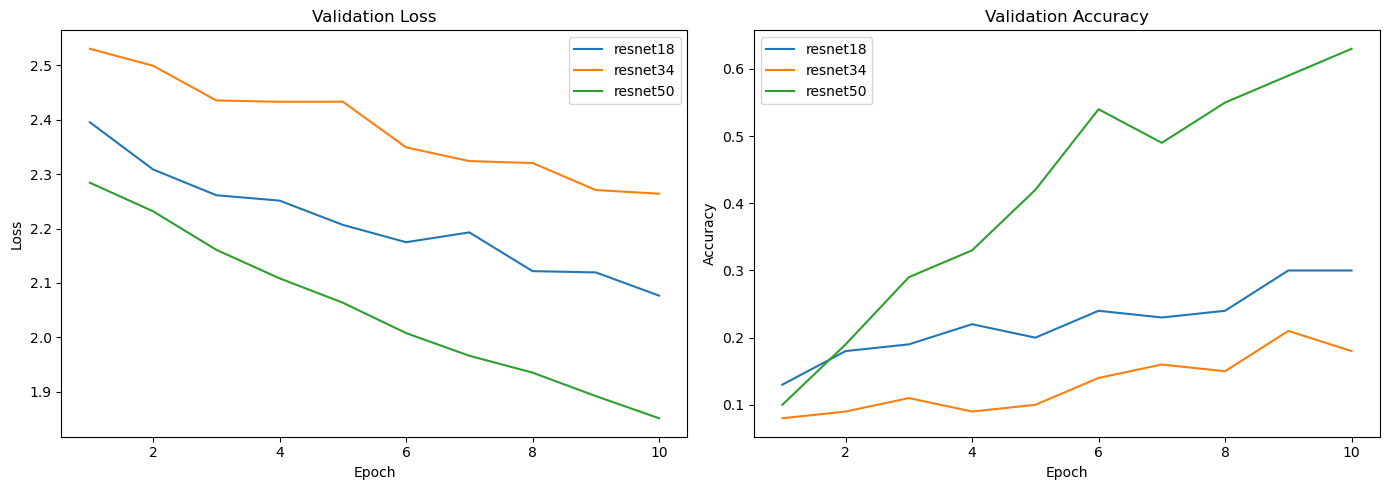

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_ROOT = "./data/mini_10class_50each"
BATCH_SIZE = 16
EPOCHS = 10
NUM_CLASSES = len(os.listdir(os.path.join(DATA_ROOT, 'train')))
MODEL_LIST = ['resnet18', 'resnet34', 'resnet50']

transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = ImageFolder(os.path.join(DATA_ROOT, 'train'), transform=transform)
val_data = ImageFolder(os.path.join(DATA_ROOT, 'val'), transform=transform)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

def get_resnet_model(name):
    if name == 'resnet18':
        model = models.resnet18(pretrained=True)
    elif name == 'resnet34':
        model = models.resnet34(pretrained=True)
    elif name == 'resnet50':
        model = models.resnet50(pretrained=True)
    else:
        raise ValueError(f"Unknown ResNet version: {name}")

    for param in model.parameters():
        param.requires_grad = False  # 백본 고정
    model.fc = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(model.fc.in_features, NUM_CLASSES)
    )
    return model.to(device)

def train_and_evaluate(model, train_loader, val_loader):
    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0
        for x, y in tqdm(train_loader, desc=f"[Train {epoch+1}]"):
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * x.size(0)
        train_loss = running_loss / len(train_loader.dataset)

        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                loss = criterion(out, y)
                val_loss += loss.item() * x.size(0)
                preds = torch.argmax(out, 1)
                correct += (preds == y).sum().item()
                total += y.size(0)
        val_loss /= total
        acc = correct / total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(acc)
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Acc={acc:.4f}")
    return train_losses, val_losses, val_accuracies

results = {}
for model_name in MODEL_LIST:
    print(f"\n🚀 Training {model_name}...")
    model = get_resnet_model(model_name)
    train_loss, val_loss, val_acc = train_and_evaluate(model, train_loader, val_loader)
    results[model_name] = {
        'train_loss': train_loss,
        'val_loss': val_loss,
        'val_acc': val_acc
    }

epochs = range(1, EPOCHS + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for name in MODEL_LIST:
    plt.plot(epochs, results[name]['val_loss'], label=f"{name}")
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
for name in MODEL_LIST:
    plt.plot(epochs, results[name]['val_acc'], label=f"{name}")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)

set_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_ROOT = "./data/mini_10class_50each"
BATCH_SIZE = 16
EPOCHS = 10

transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = ImageFolder(os.path.join(DATA_ROOT, 'train'), transform=transform)
val_data = ImageFolder(os.path.join(DATA_ROOT, 'val'), transform=transform)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
NUM_CLASSES = len(train_data.classes)
CLASS_NAMES = train_data.classes

def get_resnet_model(name):
    if name == 'resnet18':
        model = models.resnet18(pretrained=True)
    elif name == 'resnet34':
        model = models.resnet34(pretrained=True)
    elif name == 'resnet50':
        model = models.resnet50(pretrained=True)
    else:
        raise ValueError(f"Invalid model name: {name}")

    for param in model.parameters():
        param.requires_grad = False

    model.fc = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(model.fc.in_features, NUM_CLASSES)
    )

    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"\n🔍 {name}: Total params = {total_params:,}, Trainable = {trainable_params:,}")
    return model.to(device)

def train_model(model, train_loader, val_loader, epochs):
    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x, y in tqdm(train_loader, desc=f"[Train Epoch {epoch+1}]"):
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * x.size(0)
        train_loss = total_loss / len(train_loader.dataset)

        model.eval()
        total_val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                loss = criterion(out, y)
                total_val_loss += loss.item() * x.size(0)
                pred = torch.argmax(out, 1)
                correct += (pred == y).sum().item()
                total += y.size(0)
        val_loss = total_val_loss / total
        val_acc = correct / total
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Acc={val_acc:.4f}")

    return model, train_losses, val_losses, val_accuracies

def evaluate_model(model, val_loader, class_names, model_name="model"):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(device)
            out = model(x)
            pred = torch.argmax(out, 1)
            y_true.extend(y.cpu().numpy())
            y_pred.extend(pred.cpu().numpy())

    print(f"\n📊 Classification Report for {model_name}")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(f"{model_name}_confusion_matrix.png")
    plt.close()

def run_experiment(model_name):
    print(f"\n🚀 Starting experiment for {model_name}...")
    model = get_resnet_model(model_name)
    model, train_loss, val_loss, val_acc = train_model(model, train_loader, val_loader, EPOCHS)

    epochs = range(1, EPOCHS + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="Train Loss")
    plt.plot(epochs, val_loss, label="Val Loss")
    plt.title(f"{model_name} - Loss")
    plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_acc, label="Val Accuracy")
    plt.title(f"{model_name} - Accuracy")
    plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()

    plt.tight_layout()
    plt.savefig(f"{model_name}_performance.png")
    plt.close()

    evaluate_model(model, val_loader, CLASS_NAMES, model_name=model_name)
    print(f"✅ Completed {model_name}\n")

In [12]:
run_experiment('resnet18')
run_experiment('resnet34')
run_experiment('resnet50')

c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



🚀 Starting experiment for resnet18...

🔍 resnet18: Total params = 11,181,642, Trainable = 5,130


[Train Epoch 1]: 100%|██████████| 25/25 [00:01<00:00, 12.70it/s]


Epoch 1: Train Loss=2.7122, Val Loss=2.3560, Acc=0.2100


[Train Epoch 2]: 100%|██████████| 25/25 [00:01<00:00, 14.46it/s]


Epoch 2: Train Loss=2.5988, Val Loss=2.3035, Acc=0.1600


[Train Epoch 3]: 100%|██████████| 25/25 [00:01<00:00, 14.17it/s]


Epoch 3: Train Loss=2.5035, Val Loss=2.2539, Acc=0.2000


[Train Epoch 4]: 100%|██████████| 25/25 [00:01<00:00, 14.02it/s]


Epoch 4: Train Loss=2.4710, Val Loss=2.2154, Acc=0.2300


[Train Epoch 5]: 100%|██████████| 25/25 [00:01<00:00, 13.67it/s]


Epoch 5: Train Loss=2.4400, Val Loss=2.2022, Acc=0.2500


[Train Epoch 6]: 100%|██████████| 25/25 [00:01<00:00, 14.16it/s]


Epoch 6: Train Loss=2.4166, Val Loss=2.1645, Acc=0.2800


[Train Epoch 7]: 100%|██████████| 25/25 [00:01<00:00, 13.80it/s]


Epoch 7: Train Loss=2.3930, Val Loss=2.1233, Acc=0.3000


[Train Epoch 8]: 100%|██████████| 25/25 [00:01<00:00, 13.90it/s]


Epoch 8: Train Loss=2.2998, Val Loss=2.1062, Acc=0.2700


[Train Epoch 9]: 100%|██████████| 25/25 [00:01<00:00, 13.80it/s]


Epoch 9: Train Loss=2.3447, Val Loss=2.0777, Acc=0.3100


[Train Epoch 10]: 100%|██████████| 25/25 [00:01<00:00, 13.82it/s]


Epoch 10: Train Loss=2.2560, Val Loss=2.0769, Acc=0.3200

📊 Classification Report for resnet18
                      precision    recall  f1-score   support

      beef_carpaccio       0.33      0.30      0.32        10
       caprese_salad       0.50      0.40      0.44        10
         carrot_cake       0.56      0.50      0.53        10
          cheesecake       0.29      0.20      0.24        10
       croque_madame       0.40      0.60      0.48        10
              donuts       0.42      0.50      0.45        10
           escargots       0.40      0.20      0.27        10
               ramen       0.37      0.70      0.48        10
             sashimi       0.30      0.30      0.30        10
strawberry_shortcake       0.17      0.10      0.12        10

            accuracy                           0.38       100
           macro avg       0.37      0.38      0.36       100
        weighted avg       0.37      0.38      0.36       100

✅ Completed resnet18


🚀 Starting 

c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



🔍 resnet34: Total params = 21,289,802, Trainable = 5,130


[Train Epoch 1]: 100%|██████████| 25/25 [00:02<00:00, 12.08it/s]


Epoch 1: Train Loss=2.7813, Val Loss=2.5400, Acc=0.0700


[Train Epoch 2]: 100%|██████████| 25/25 [00:01<00:00, 12.54it/s]


Epoch 2: Train Loss=2.6298, Val Loss=2.4752, Acc=0.1100


[Train Epoch 3]: 100%|██████████| 25/25 [00:01<00:00, 12.51it/s]


Epoch 3: Train Loss=2.6023, Val Loss=2.4368, Acc=0.1100


[Train Epoch 4]: 100%|██████████| 25/25 [00:01<00:00, 12.57it/s]


Epoch 4: Train Loss=2.5409, Val Loss=2.3968, Acc=0.0900


[Train Epoch 5]: 100%|██████████| 25/25 [00:01<00:00, 12.52it/s]


Epoch 5: Train Loss=2.5121, Val Loss=2.3815, Acc=0.1000


[Train Epoch 6]: 100%|██████████| 25/25 [00:02<00:00, 12.49it/s]


Epoch 6: Train Loss=2.4274, Val Loss=2.3217, Acc=0.1400


[Train Epoch 7]: 100%|██████████| 25/25 [00:01<00:00, 12.57it/s]


Epoch 7: Train Loss=2.3977, Val Loss=2.3153, Acc=0.1700


[Train Epoch 8]: 100%|██████████| 25/25 [00:02<00:00, 12.45it/s]


Epoch 8: Train Loss=2.4037, Val Loss=2.2415, Acc=0.1700


[Train Epoch 9]: 100%|██████████| 25/25 [00:01<00:00, 12.57it/s]


Epoch 9: Train Loss=2.3561, Val Loss=2.2270, Acc=0.1900


[Train Epoch 10]: 100%|██████████| 25/25 [00:01<00:00, 12.54it/s]


Epoch 10: Train Loss=2.3994, Val Loss=2.2053, Acc=0.1700

📊 Classification Report for resnet34
                      precision    recall  f1-score   support

      beef_carpaccio       0.00      0.00      0.00        10
       caprese_salad       0.13      0.20      0.16        10
         carrot_cake       0.12      0.10      0.11        10
          cheesecake       0.20      0.20      0.20        10
       croque_madame       0.22      0.20      0.21        10
              donuts       0.36      0.40      0.38        10
           escargots       0.33      0.20      0.25        10
               ramen       0.20      0.30      0.24        10
             sashimi       0.20      0.20      0.20        10
strawberry_shortcake       0.22      0.20      0.21        10

            accuracy                           0.20       100
           macro avg       0.20      0.20      0.20       100
        weighted avg       0.20      0.20      0.20       100

✅ Completed resnet34


🚀 Starting 

c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



🔍 resnet50: Total params = 23,528,522, Trainable = 20,490


[Train Epoch 1]: 100%|██████████| 25/25 [00:02<00:00, 10.05it/s]


Epoch 1: Train Loss=2.3788, Val Loss=2.2564, Acc=0.1600


[Train Epoch 2]: 100%|██████████| 25/25 [00:02<00:00, 10.16it/s]


Epoch 2: Train Loss=2.2617, Val Loss=2.1967, Acc=0.2500


[Train Epoch 3]: 100%|██████████| 25/25 [00:02<00:00, 10.14it/s]


Epoch 3: Train Loss=2.1806, Val Loss=2.1446, Acc=0.3500


[Train Epoch 4]: 100%|██████████| 25/25 [00:02<00:00, 10.14it/s]


Epoch 4: Train Loss=2.1242, Val Loss=2.1041, Acc=0.4000


[Train Epoch 5]: 100%|██████████| 25/25 [00:02<00:00, 10.04it/s]


Epoch 5: Train Loss=2.0873, Val Loss=2.0589, Acc=0.4300


[Train Epoch 6]: 100%|██████████| 25/25 [00:02<00:00, 10.11it/s]


Epoch 6: Train Loss=2.0268, Val Loss=1.9997, Acc=0.4900


[Train Epoch 7]: 100%|██████████| 25/25 [00:02<00:00, 10.12it/s]


Epoch 7: Train Loss=1.9604, Val Loss=1.9699, Acc=0.4700


[Train Epoch 8]: 100%|██████████| 25/25 [00:02<00:00,  9.98it/s]


Epoch 8: Train Loss=1.9756, Val Loss=1.9309, Acc=0.5400


[Train Epoch 9]: 100%|██████████| 25/25 [00:02<00:00, 10.09it/s]


Epoch 9: Train Loss=1.8573, Val Loss=1.9112, Acc=0.5200


[Train Epoch 10]: 100%|██████████| 25/25 [00:02<00:00, 10.02it/s]


Epoch 10: Train Loss=1.8196, Val Loss=1.8641, Acc=0.5700

📊 Classification Report for resnet50
                      precision    recall  f1-score   support

      beef_carpaccio       0.62      0.50      0.56        10
       caprese_salad       0.22      0.20      0.21        10
         carrot_cake       0.78      0.70      0.74        10
          cheesecake       0.71      0.50      0.59        10
       croque_madame       0.67      0.60      0.63        10
              donuts       0.55      0.60      0.57        10
           escargots       0.56      0.50      0.53        10
               ramen       0.47      0.90      0.62        10
             sashimi       0.53      0.80      0.64        10
strawberry_shortcake       0.50      0.20      0.29        10

            accuracy                           0.55       100
           macro avg       0.56      0.55      0.54       100
        weighted avg       0.56      0.55      0.54       100

✅ Completed resnet50



c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
[Train Epoch 1]: 100%|██████████| 25/25 [00:06<00:00,  3.68it/s]


Epoch 1: Train Loss=2.3624, Val Loss=2.1858, Acc=0.2800


[Train Epoch 2]: 100%|██████████| 25/25 [00:06<00:00,  3.81it/s]


Epoch 2: Train Loss=2.1119, Val Loss=1.9808, Acc=0.5000


[Train Epoch 3]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 3: Train Loss=1.9023, Val Loss=1.8115, Acc=0.5200


[Train Epoch 4]: 100%|██████████| 25/25 [00:06<00:00,  3.77it/s]


Epoch 4: Train Loss=1.6818, Val Loss=1.6300, Acc=0.6400


[Train Epoch 5]: 100%|██████████| 25/25 [00:06<00:00,  3.80it/s]


Epoch 5: Train Loss=1.4757, Val Loss=1.4595, Acc=0.7000


[Train Epoch 6]: 100%|██████████| 25/25 [00:06<00:00,  3.80it/s]


Epoch 6: Train Loss=1.3047, Val Loss=1.4563, Acc=0.5900


[Train Epoch 7]: 100%|██████████| 25/25 [00:06<00:00,  3.81it/s]


Epoch 7: Train Loss=1.1643, Val Loss=1.4026, Acc=0.6600


[Train Epoch 8]: 100%|██████████| 25/25 [00:06<00:00,  3.80it/s]


Epoch 8: Train Loss=1.1272, Val Loss=1.3246, Acc=0.7200


[Train Epoch 9]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 9: Train Loss=1.0439, Val Loss=1.2588, Acc=0.7400


[Train Epoch 10]: 100%|██████████| 25/25 [00:06<00:00,  3.80it/s]


Epoch 10: Train Loss=0.9923, Val Loss=1.2675, Acc=0.6800


[Train Epoch 11]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 11: Train Loss=0.9398, Val Loss=1.2821, Acc=0.6900


[Train Epoch 12]: 100%|██████████| 25/25 [00:06<00:00,  3.77it/s]


Epoch 12: Train Loss=0.9350, Val Loss=1.2635, Acc=0.6900


[Train Epoch 13]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 13: Train Loss=0.9243, Val Loss=1.2674, Acc=0.7100


[Train Epoch 14]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 14: Train Loss=0.8968, Val Loss=1.2111, Acc=0.7400


[Train Epoch 15]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 15: Train Loss=0.8512, Val Loss=1.2169, Acc=0.7200


[Train Epoch 16]: 100%|██████████| 25/25 [00:06<00:00,  3.80it/s]


Epoch 16: Train Loss=0.8198, Val Loss=1.1977, Acc=0.7300


[Train Epoch 17]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 17: Train Loss=0.8245, Val Loss=1.2532, Acc=0.6800


[Train Epoch 18]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 18: Train Loss=0.8188, Val Loss=1.2631, Acc=0.6200


[Train Epoch 19]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 19: Train Loss=0.8103, Val Loss=1.2553, Acc=0.6900


[Train Epoch 20]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 20: Train Loss=0.7698, Val Loss=1.2206, Acc=0.7000


[Train Epoch 21]: 100%|██████████| 25/25 [00:06<00:00,  3.77it/s]


Epoch 21: Train Loss=0.8029, Val Loss=1.1870, Acc=0.7200


[Train Epoch 22]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 22: Train Loss=0.8003, Val Loss=1.1840, Acc=0.7200


[Train Epoch 23]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 23: Train Loss=0.7850, Val Loss=1.2020, Acc=0.7400


[Train Epoch 24]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 24: Train Loss=0.7607, Val Loss=1.2171, Acc=0.7000


[Train Epoch 25]: 100%|██████████| 25/25 [00:06<00:00,  3.77it/s]


Epoch 25: Train Loss=0.7765, Val Loss=1.2268, Acc=0.7200


[Train Epoch 26]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 26: Train Loss=0.7537, Val Loss=1.1731, Acc=0.7400


[Train Epoch 27]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 27: Train Loss=0.7852, Val Loss=1.2501, Acc=0.6700


[Train Epoch 28]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 28: Train Loss=0.7642, Val Loss=1.1644, Acc=0.7400


[Train Epoch 29]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 29: Train Loss=0.7397, Val Loss=1.1927, Acc=0.7200


[Train Epoch 30]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 30: Train Loss=0.7774, Val Loss=1.2323, Acc=0.7100


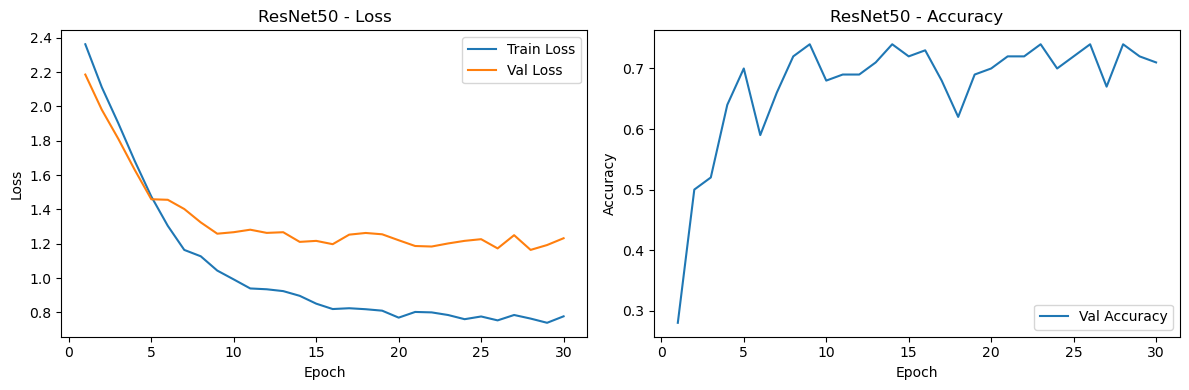


📊 Classification Report (ResNet50)
                      precision    recall  f1-score   support

      beef_carpaccio       0.57      0.80      0.67        10
       caprese_salad       0.56      0.50      0.53        10
         carrot_cake       0.55      0.60      0.57        10
          cheesecake       0.56      0.50      0.53        10
       croque_madame       0.86      0.60      0.71        10
              donuts       0.62      0.80      0.70        10
           escargots       1.00      0.70      0.82        10
               ramen       0.89      0.80      0.84        10
             sashimi       0.89      0.80      0.84        10
strawberry_shortcake       0.50      0.60      0.55        10

            accuracy                           0.67       100
           macro avg       0.70      0.67      0.67       100
        weighted avg       0.70      0.67      0.67       100



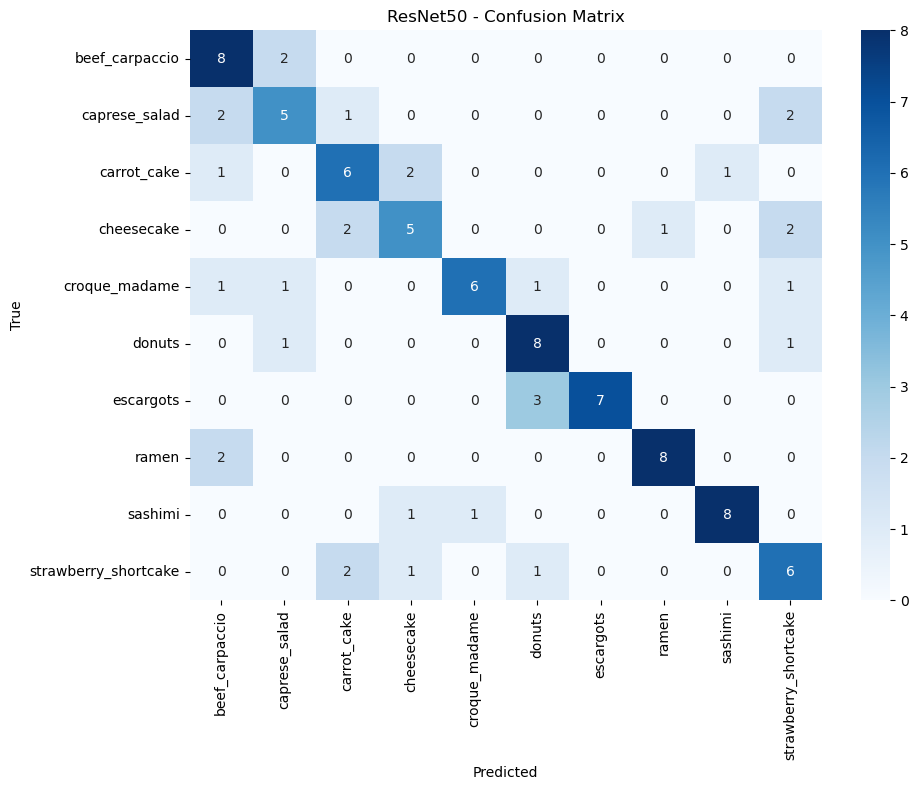

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)

set_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_ROOT = "./data/mini_10class_50each"
BATCH_SIZE = 16
EPOCHS = 30
PATIENCE = 5

transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(0.3, 0.3, 0.3, 0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = ImageFolder(os.path.join(DATA_ROOT, 'train'), transform=transform)
val_data = ImageFolder(os.path.join(DATA_ROOT, 'val'), transform=transform)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
NUM_CLASSES = len(train_data.classes)
CLASS_NAMES = train_data.classes

def get_resnet50_finetune():
    model = models.resnet50(pretrained=True)
    for param in model.parameters():
        param.requires_grad = True  # 전체 fine-tuning
    model.fc = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(model.fc.in_features, NUM_CLASSES)
    )
    return model.to(device)

def train_model(model, train_loader, val_loader, epochs, patience):
    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    optimizer = optim.AdamW(model.parameters(), lr=3e-5, weight_decay=1e-2)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    best_loss = float('inf')
    wait = 0
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x, y in tqdm(train_loader, desc=f"[Train Epoch {epoch+1}]"):
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * x.size(0)
        train_loss = total_loss / len(train_loader.dataset)

        model.eval()
        total_val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                loss = criterion(out, y)
                total_val_loss += loss.item() * x.size(0)
                pred = torch.argmax(out, 1)
                correct += (pred == y).sum().item()
                total += y.size(0)
        val_loss = total_val_loss / total
        val_acc = correct / total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Acc={val_acc:.4f}")
        scheduler.step()

        if val_loss < best_loss:
            best_loss = val_loss
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print("⏹️ Early stopping triggered")
                break

    return model, train_losses, val_losses, val_accuracies

def evaluate_model(model, val_loader, class_names):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(device)
            out = model(x)
            pred = torch.argmax(out, 1)
            y_true.extend(y.cpu().numpy())
            y_pred.extend(pred.cpu().numpy())

    print("\n📊 Classification Report (ResNet50)")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title("ResNet50 - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

model = get_resnet50_finetune()
model, train_loss, val_loss, val_acc = train_model(model, train_loader, val_loader, EPOCHS, PATIENCE)

epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Val Loss")
plt.title("ResNet50 - Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_acc, label="Val Accuracy")
plt.title("ResNet50 - Accuracy")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()

plt.tight_layout()
plt.show()

evaluate_model(model, val_loader, CLASS_NAMES)


c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
[Train Epoch 1]: 100%|██████████| 25/25 [00:06<00:00,  3.61it/s]


Epoch 1: Train Loss=2.3440, Val Loss=2.1971, Acc=0.2100


[Train Epoch 2]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 2: Train Loss=2.1618, Val Loss=2.0186, Acc=0.4200


[Train Epoch 3]: 100%|██████████| 25/25 [00:06<00:00,  3.77it/s]


Epoch 3: Train Loss=2.0190, Val Loss=1.8469, Acc=0.5300


[Train Epoch 4]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 4: Train Loss=1.8169, Val Loss=1.5946, Acc=0.5600


[Train Epoch 5]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 5: Train Loss=1.6895, Val Loss=1.4591, Acc=0.5700


[Train Epoch 6]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 6: Train Loss=1.5428, Val Loss=1.3630, Acc=0.6000


[Train Epoch 7]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 7: Train Loss=1.4489, Val Loss=1.2859, Acc=0.6500


[Train Epoch 8]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 8: Train Loss=1.2435, Val Loss=1.1761, Acc=0.6600


[Train Epoch 9]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 9: Train Loss=1.3910, Val Loss=1.1713, Acc=0.7000


[Train Epoch 10]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 10: Train Loss=1.2814, Val Loss=1.1877, Acc=0.6900


[Train Epoch 11]: 100%|██████████| 25/25 [00:06<00:00,  3.80it/s]


Epoch 11: Train Loss=1.3280, Val Loss=1.0916, Acc=0.7200


[Train Epoch 12]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 12: Train Loss=1.0824, Val Loss=1.1335, Acc=0.6700


[Train Epoch 13]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 13: Train Loss=1.1704, Val Loss=1.1031, Acc=0.7000


[Train Epoch 14]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 14: Train Loss=1.2943, Val Loss=1.0892, Acc=0.6500


[Train Epoch 15]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 15: Train Loss=1.1225, Val Loss=1.0273, Acc=0.7400


[Train Epoch 16]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 16: Train Loss=1.0083, Val Loss=1.0021, Acc=0.7600


[Train Epoch 17]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 17: Train Loss=1.1556, Val Loss=1.0472, Acc=0.7500


[Train Epoch 18]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 18: Train Loss=1.1071, Val Loss=1.0679, Acc=0.6800


[Train Epoch 19]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 19: Train Loss=1.1008, Val Loss=1.0328, Acc=0.6700


[Train Epoch 20]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 20: Train Loss=1.0562, Val Loss=0.9838, Acc=0.7400


[Train Epoch 21]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 21: Train Loss=1.0495, Val Loss=1.0336, Acc=0.7400


[Train Epoch 22]: 100%|██████████| 25/25 [00:06<00:00,  3.77it/s]


Epoch 22: Train Loss=0.9796, Val Loss=0.9814, Acc=0.7600


[Train Epoch 23]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 23: Train Loss=1.2710, Val Loss=1.0299, Acc=0.6900


[Train Epoch 24]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 24: Train Loss=1.0539, Val Loss=1.0160, Acc=0.7300


[Train Epoch 25]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 25: Train Loss=1.0810, Val Loss=1.0029, Acc=0.7100


[Train Epoch 26]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 26: Train Loss=1.0893, Val Loss=1.0281, Acc=0.7200


[Train Epoch 27]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 27: Train Loss=1.2005, Val Loss=0.9744, Acc=0.7500


[Train Epoch 28]: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]


Epoch 28: Train Loss=1.1446, Val Loss=1.0286, Acc=0.6900


[Train Epoch 29]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 29: Train Loss=0.9544, Val Loss=0.9851, Acc=0.7200


[Train Epoch 30]: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]


Epoch 30: Train Loss=1.1127, Val Loss=1.0008, Acc=0.6900


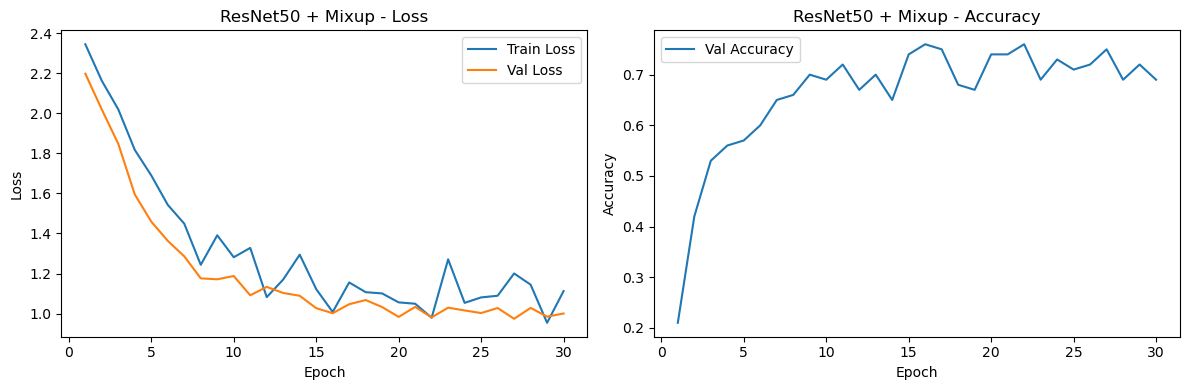


📊 Classification Report (Mixup + ResNet50)
                      precision    recall  f1-score   support

      beef_carpaccio       0.60      0.60      0.60        10
       caprese_salad       0.50      0.50      0.50        10
         carrot_cake       0.75      0.60      0.67        10
          cheesecake       0.50      0.70      0.58        10
       croque_madame       1.00      0.50      0.67        10
              donuts       0.57      0.80      0.67        10
           escargots       1.00      0.70      0.82        10
               ramen       0.69      0.90      0.78        10
             sashimi       0.90      0.90      0.90        10
strawberry_shortcake       0.56      0.50      0.53        10

            accuracy                           0.67       100
           macro avg       0.71      0.67      0.67       100
        weighted avg       0.71      0.67      0.67       100



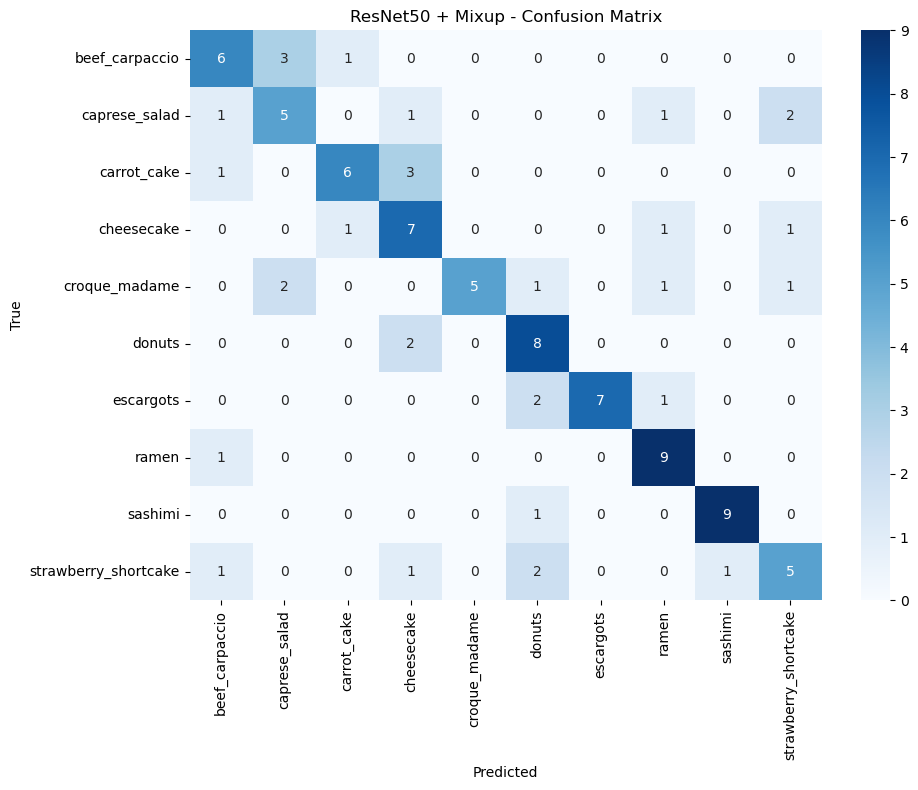

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)

set_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_ROOT = "./data/mini_10class_50each"
BATCH_SIZE = 16
EPOCHS = 30
PATIENCE = 5
ALPHA = 0.4  # Mixup alpha

transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(0.3, 0.3, 0.3, 0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = ImageFolder(os.path.join(DATA_ROOT, 'train'), transform=transform)
val_data = ImageFolder(os.path.join(DATA_ROOT, 'val'), transform=transform)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
NUM_CLASSES = len(train_data.classes)
CLASS_NAMES = train_data.classes

def get_resnet50_finetune():
    model = models.resnet50(pretrained=True)
    for param in model.parameters():
        param.requires_grad = True
    model.fc = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(model.fc.in_features, NUM_CLASSES)
    )
    return model.to(device)

def mixup_data(x, y, alpha=1.0):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

def train_model_mixup(model, train_loader, val_loader, epochs, patience, alpha):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=3e-5, weight_decay=1e-2)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    best_loss = float('inf')
    wait = 0
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x, y in tqdm(train_loader, desc=f"[Train Epoch {epoch+1}]"):
            x, y = x.to(device), y.to(device)
            inputs, targets_a, targets_b, lam = mixup_data(x, y, alpha)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * x.size(0)
        train_loss = total_loss / len(train_loader.dataset)

        model.eval()
        total_val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                loss = criterion(out, y)
                total_val_loss += loss.item() * x.size(0)
                pred = torch.argmax(out, 1)
                correct += (pred == y).sum().item()
                total += y.size(0)
        val_loss = total_val_loss / total
        val_acc = correct / total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Acc={val_acc:.4f}")
        scheduler.step()

        if val_loss < best_loss:
            best_loss = val_loss
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print("⏹️ Early stopping triggered")
                break

    return model, train_losses, val_losses, val_accuracies

from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, val_loader, class_names):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(device)
            out = model(x)
            pred = torch.argmax(out, 1)
            y_true.extend(y.cpu().numpy())
            y_pred.extend(pred.cpu().numpy())

    print("\n📊 Classification Report (Mixup + ResNet50)")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title("ResNet50 + Mixup - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

model = get_resnet50_finetune()
model, train_loss, val_loss, val_acc = train_model_mixup(
    model, train_loader, val_loader, EPOCHS, PATIENCE, ALPHA
)

epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Val Loss")
plt.title("ResNet50 + Mixup - Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_acc, label="Val Accuracy")
plt.title("ResNet50 + Mixup - Accuracy")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()

plt.tight_layout()
plt.show()

evaluate_model(model, val_loader, CLASS_NAMES)


In [ ]:
import os
import shutil

confused_classes = [
    "beef_carpaccio", "caprese_salad",
    "carrot_cake", "cheesecake",
    "croque_madame"
]

base_path = "data/mini_10class_50each"

focused_path = "data/confused_subset"

for split in ["train", "val"]:
    for cls in confused_classes:
        src_dir = os.path.join(base_path, split, cls)
        dst_dir = os.path.join(focused_path, split, cls)
        os.makedirs(dst_dir, exist_ok=True)

        if not os.path.exists(src_dir):
            print(f"❌ 경로 없음: {src_dir}")
            continue

        for fname in os.listdir(src_dir):
            src_file = os.path.join(src_dir, fname)
            dst_file = os.path.join(dst_dir, fname)
            shutil.copy2(src_file, dst_file)

print("✅ 혼동 클래스 복사 완료.")


✅ 혼동 클래스 복사 완료.


c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Train 1: 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]


Epoch 1 | Train Loss: 1.6424 | Val Loss: 1.4724 | Val Acc: 0.5200


Train 2: 100%|██████████| 13/13 [00:03<00:00,  4.33it/s]


Epoch 2 | Train Loss: 1.3982 | Val Loss: 1.4091 | Val Acc: 0.4600


Train 3: 100%|██████████| 13/13 [00:03<00:00,  4.32it/s]


Epoch 3 | Train Loss: 1.2557 | Val Loss: 1.2237 | Val Acc: 0.7000


Train 4: 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]


Epoch 4 | Train Loss: 1.0875 | Val Loss: 1.1276 | Val Acc: 0.7800


Train 5: 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]


Epoch 5 | Train Loss: 0.9510 | Val Loss: 1.0055 | Val Acc: 0.7600


Train 6: 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]


Epoch 6 | Train Loss: 0.8181 | Val Loss: 0.9823 | Val Acc: 0.7600


Train 7: 100%|██████████| 13/13 [00:03<00:00,  4.28it/s]


Epoch 7 | Train Loss: 0.7917 | Val Loss: 0.9786 | Val Acc: 0.7000


Train 8: 100%|██████████| 13/13 [00:02<00:00,  4.34it/s]


Epoch 8 | Train Loss: 0.6768 | Val Loss: 1.0018 | Val Acc: 0.6400


Train 9: 100%|██████████| 13/13 [00:02<00:00,  4.34it/s]


Epoch 9 | Train Loss: 0.6454 | Val Loss: 0.8843 | Val Acc: 0.7800


Train 10: 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]


Epoch 10 | Train Loss: 0.6407 | Val Loss: 0.9081 | Val Acc: 0.7400


Train 11: 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]


Epoch 11 | Train Loss: 0.5961 | Val Loss: 0.9767 | Val Acc: 0.7000


Train 12: 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]


Epoch 12 | Train Loss: 0.5924 | Val Loss: 0.9352 | Val Acc: 0.7400


Train 13: 100%|██████████| 13/13 [00:03<00:00,  4.32it/s]


Epoch 13 | Train Loss: 0.5614 | Val Loss: 0.8855 | Val Acc: 0.7600


Train 14: 100%|██████████| 13/13 [00:03<00:00,  4.31it/s]


Epoch 14 | Train Loss: 0.5596 | Val Loss: 0.8605 | Val Acc: 0.7600


Train 15: 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]


Epoch 15 | Train Loss: 0.5543 | Val Loss: 0.8250 | Val Acc: 0.8000


Train 16: 100%|██████████| 13/13 [00:03<00:00,  4.31it/s]


Epoch 16 | Train Loss: 0.5192 | Val Loss: 0.8301 | Val Acc: 0.7800


Train 17: 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]


Epoch 17 | Train Loss: 0.5213 | Val Loss: 0.8833 | Val Acc: 0.7200


Train 18: 100%|██████████| 13/13 [00:03<00:00,  4.31it/s]


Epoch 18 | Train Loss: 0.5516 | Val Loss: 0.8611 | Val Acc: 0.8000


Train 19: 100%|██████████| 13/13 [00:03<00:00,  4.28it/s]


Epoch 19 | Train Loss: 0.5566 | Val Loss: 0.8825 | Val Acc: 0.7600


Train 20: 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]


Epoch 20 | Train Loss: 0.5215 | Val Loss: 0.8417 | Val Acc: 0.8200
⏹️ Early stopping triggered


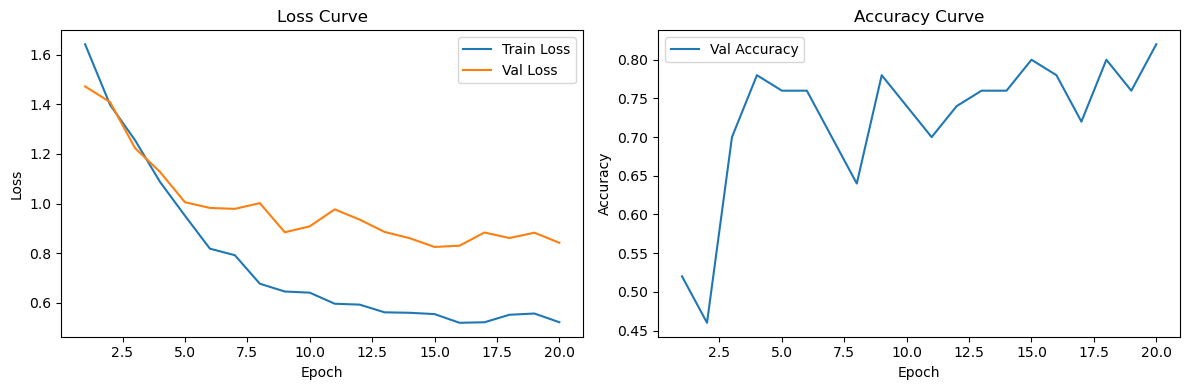


📊 Classification Report
                precision    recall  f1-score   support

beef_carpaccio       0.67      0.80      0.73        10
 caprese_salad       0.64      0.70      0.67        10
   carrot_cake       0.89      0.80      0.84        10
    cheesecake       0.89      0.80      0.84        10
 croque_madame       0.89      0.80      0.84        10

      accuracy                           0.78        50
     macro avg       0.79      0.78      0.78        50
  weighted avg       0.79      0.78      0.78        50



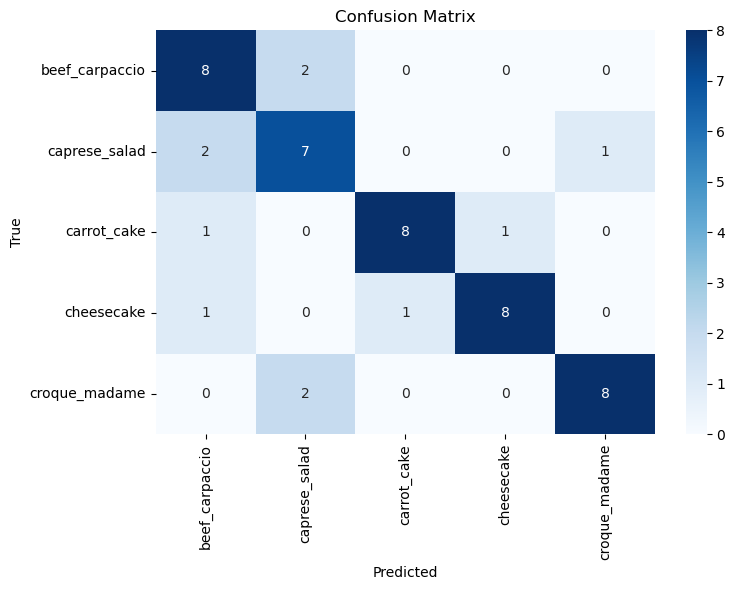

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import random

def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)

set_seed(42)

DATA_PATH = "data/confused_subset"
BATCH_SIZE = 16
EPOCHS = 30
PATIENCE = 5
IMG_SIZE = 160

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(0.3, 0.3, 0.3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = ImageFolder(os.path.join(DATA_PATH, "train"), transform=transform)
val_data = ImageFolder(os.path.join(DATA_PATH, "val"), transform=transform)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

NUM_CLASSES = len(train_data.classes)
CLASS_NAMES = train_data.classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def get_resnet50():
    model = models.resnet50(pretrained=True)
    for param in model.parameters():
        param.requires_grad = True
    model.fc = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(model.fc.in_features, NUM_CLASSES)
    )
    return model.to(device)

def train(model, train_loader, val_loader):
    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    optimizer = optim.AdamW(model.parameters(), lr=3e-5, weight_decay=1e-2)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    best_loss = float('inf')
    wait = 0
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0
        for x, y in tqdm(train_loader, desc=f"Train {epoch+1}"):
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * x.size(0)
        train_loss = running_loss / len(train_loader.dataset)

        model.eval()
        total_val_loss, correct = 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                loss = criterion(out, y)
                total_val_loss += loss.item() * x.size(0)
                pred = torch.argmax(out, dim=1)
                correct += (pred == y).sum().item()
        val_loss = total_val_loss / len(val_loader.dataset)
        val_acc = correct / len(val_loader.dataset)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
        scheduler.step()

        if val_loss < best_loss:
            best_loss = val_loss
            wait = 0
        else:
            wait += 1
            if wait >= PATIENCE:
                print("⏹️ Early stopping triggered")
                break

    return model, train_losses, val_losses, val_accuracies

def evaluate(model, val_loader, class_names):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(device)
            out = model(x)
            pred = torch.argmax(out, 1)
            y_true.extend(y.cpu().numpy())
            y_pred.extend(pred.cpu().numpy())

    print("\n📊 Classification Report")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

model = get_resnet50()
model, train_loss, val_loss, val_acc = train(model, train_loader, val_loader)

epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_acc, label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()

plt.tight_layout()
plt.show()

evaluate(model, val_loader, CLASS_NAMES)


✅ 선택된 클래스: ['beef_carpaccio', 'caprese_salad', 'carrot_cake', 'cheesecake', 'croque_madame', 'donuts', 'escargots', 'ramen', 'sashimi', 'strawberry_shortcake']


c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Train Epoch 1: 100%|██████████| 250/250 [03:07<00:00,  1.33it/s]


Epoch 1 | Train Loss: 1.0117 | Val Loss: 0.4283 | Acc: 0.8735


Train Epoch 2: 100%|██████████| 250/250 [03:06<00:00,  1.34it/s]


Epoch 2 | Train Loss: 0.3810 | Val Loss: 0.3343 | Acc: 0.8910


Train Epoch 3: 100%|██████████| 250/250 [03:04<00:00,  1.36it/s]


Epoch 3 | Train Loss: 0.2597 | Val Loss: 0.3249 | Acc: 0.8950


Train Epoch 4: 100%|██████████| 250/250 [03:04<00:00,  1.36it/s]


Epoch 4 | Train Loss: 0.1787 | Val Loss: 0.3121 | Acc: 0.9090


Train Epoch 5: 100%|██████████| 250/250 [03:03<00:00,  1.36it/s]


Epoch 5 | Train Loss: 0.1423 | Val Loss: 0.3130 | Acc: 0.8990


Train Epoch 6: 100%|██████████| 250/250 [03:03<00:00,  1.36it/s]


Epoch 6 | Train Loss: 0.0971 | Val Loss: 0.2863 | Acc: 0.9090


Train Epoch 7: 100%|██████████| 250/250 [03:03<00:00,  1.36it/s]


Epoch 7 | Train Loss: 0.0706 | Val Loss: 0.2777 | Acc: 0.9120


Train Epoch 8: 100%|██████████| 250/250 [03:03<00:00,  1.36it/s]


Epoch 8 | Train Loss: 0.0596 | Val Loss: 0.3084 | Acc: 0.9105


Train Epoch 9: 100%|██████████| 250/250 [03:03<00:00,  1.36it/s]


Epoch 9 | Train Loss: 0.0536 | Val Loss: 0.3073 | Acc: 0.9095


Train Epoch 10: 100%|██████████| 250/250 [03:03<00:00,  1.36it/s]


Epoch 10 | Train Loss: 0.0413 | Val Loss: 0.2994 | Acc: 0.9080
⏹️ Early stopping triggered.


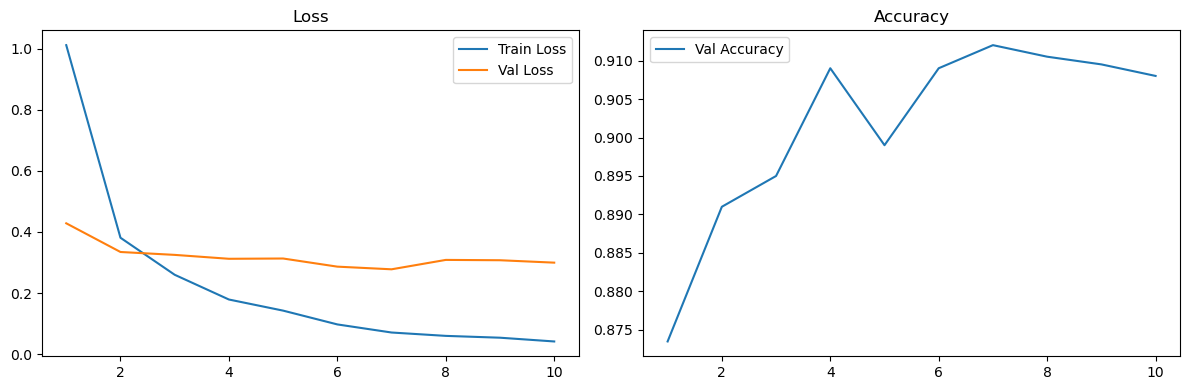


📊 Classification Report
                      precision    recall  f1-score   support

      beef_carpaccio       0.91      0.94      0.92       200
       caprese_salad       0.89      0.90      0.89       200
         carrot_cake       0.89      0.84      0.87       200
          cheesecake       0.85      0.82      0.84       200
       croque_madame       0.95      0.94      0.95       200
              donuts       0.92      0.94      0.93       200
           escargots       0.95      0.96      0.96       200
               ramen       0.96      0.96      0.96       200
             sashimi       0.94      0.91      0.93       200
strawberry_shortcake       0.82      0.88      0.85       200

            accuracy                           0.91      2000
           macro avg       0.91      0.91      0.91      2000
        weighted avg       0.91      0.91      0.91      2000



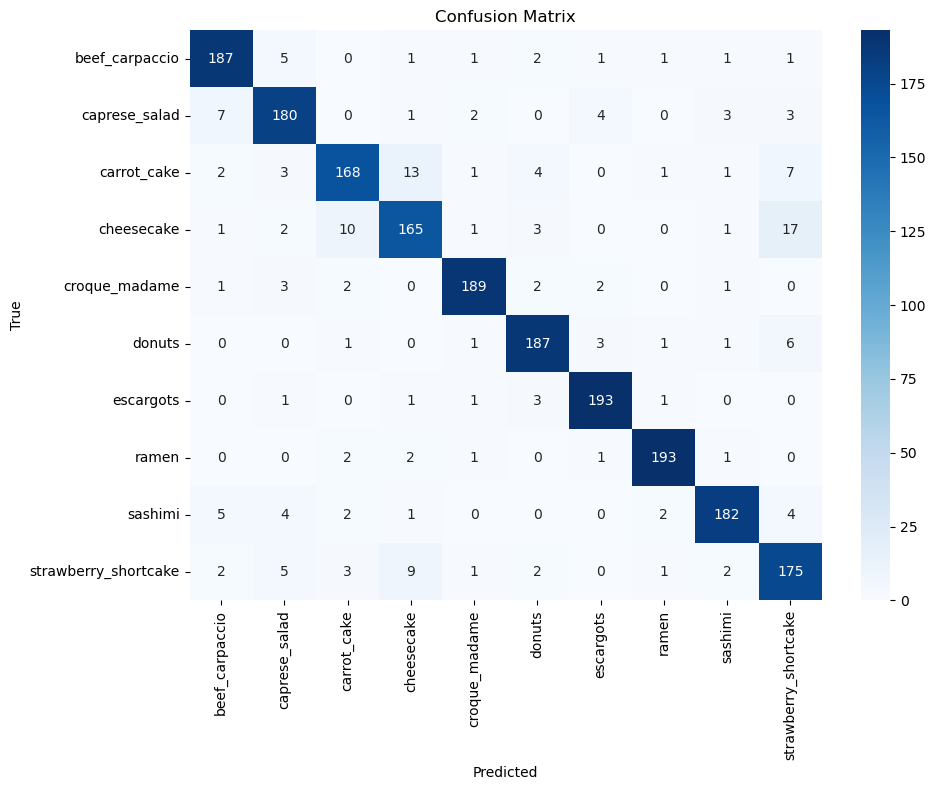

In [ ]:
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from PIL import Image

DATA_DIR = "./data/food-101/images"
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 15
PATIENCE = 3
SEED = 42
NUM_CLASSES = 10  # 클래스 수

def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)

set_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ALL_CLASSES = sorted(os.listdir(DATA_DIR))
SELECTED_CLASSES = sorted(random.sample(ALL_CLASSES, NUM_CLASSES))

print(f"✅ 선택된 클래스: {SELECTED_CLASSES}")

class FilteredImageFolder(datasets.ImageFolder):
    def find_classes(self, directory):
        classes = [d for d in os.listdir(directory) if d in SELECTED_CLASSES and os.path.isdir(os.path.join(directory, d))]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.3, 0.3, 0.3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

full_dataset = FilteredImageFolder(DATA_DIR, transform=transform)
targets = full_dataset.targets

train_idx, val_idx = train_test_split(
    np.arange(len(targets)),
    test_size=0.2,
    stratify=targets,
    random_state=SEED
)

train_dataset = Subset(full_dataset, train_idx)
val_dataset = Subset(full_dataset, val_idx)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

def get_resnet50(num_classes):
    model = models.resnet50(pretrained=True)
    for param in model.parameters():
        param.requires_grad = True
    model.fc = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(model.fc.in_features, num_classes)
    )
    return model.to(device)

def train_model(model, train_loader, val_loader):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=3e-5)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    best_loss = float("inf")
    wait = 0
    history = {"train_loss": [], "val_loss": [], "val_acc": []}

    for epoch in range(EPOCHS):
        model.train()
        total_loss = 0
        for x, y in tqdm(train_loader, desc=f"Train Epoch {epoch+1}"):
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * x.size(0)
        train_loss = total_loss / len(train_loader.dataset)

        model.eval()
        val_loss, correct = 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                loss = criterion(out, y)
                val_loss += loss.item() * x.size(0)
                pred = out.argmax(1)
                correct += (pred == y).sum().item()
        val_loss /= len(val_loader.dataset)
        val_acc = correct / len(val_loader.dataset)

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")
        scheduler.step()

        if val_loss < best_loss:
            best_loss = val_loss
            wait = 0
        else:
            wait += 1
            if wait >= PATIENCE:
                print("⏹️ Early stopping triggered.")
                break

    return model, history

def plot_history(history):
    epochs = range(1, len(history["train_loss"]) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["train_loss"], label="Train Loss")
    plt.plot(epochs, history["val_loss"], label="Val Loss")
    plt.legend(); plt.title("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["val_acc"], label="Val Accuracy")
    plt.legend(); plt.title("Accuracy")
    plt.tight_layout()
    plt.show()

def evaluate(model, val_loader, class_names):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(device)
            out = model(x)
            pred = out.argmax(1)
            y_true.extend(y.cpu().numpy())
            y_pred.extend(pred.cpu().numpy())
    print("\n📊 Classification Report")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

model = get_resnet50(num_classes=NUM_CLASSES)
model, history = train_model(model, train_loader, val_loader)
plot_history(history)
evaluate(model, val_loader, full_dataset.classes)
